In [1]:
# import basic packages
import scipy.io, torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2, os, random, math

torch.set_default_dtype(torch.float64)

# 第一題：
- 以下說明解題步驟跟解說每個區塊的程式碼
- 在 back propagation 的地方除了自己實作之外，也和目前 deep learning 框架 "Pytorch" 比較優化結果

1. 首先，先讀 data 資料，並根據題意算出 
    $$ 
       ( x ^ 2 , x, 1 )
    $$ 
    各項，同時將這三個資料 concatenate 在一起，形成
    $$
    \left\{
       \begin{matrix}
       1 & x_1 & x_1^2 \\
       1 & x_2 & x_2^2 \\
       1 & x_3 & x_3^2 \\
       1 & x_4 & x_4^2 \\
       ...
      \end{matrix} 
    \right\}
    $$
2. 然後先將 data 中的 "x" 跟 對應的答案 "y" 畫出來 ( scatter plot )

[[1.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e-03 1.00000e-06]
 [1.00000e+00 2.00000e-03 4.00000e-06]
 ...
 [1.00000e+00 9.98000e-01 9.96004e-01]
 [1.00000e+00 9.99000e-01 9.98001e-01]
 [1.00000e+00 1.00000e+00 1.00000e+00]]


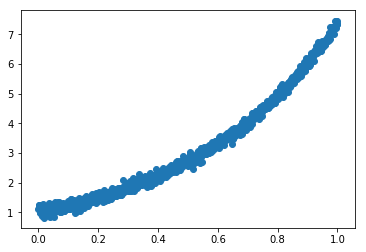

In [2]:
# read data
data = scipy.io.loadmat('data.mat')
x, y = data['x'].reshape(-1), data['y'].reshape(-1)
train_data = np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
train_data = np.concatenate((train_data,x[:,np.newaxis]**2),axis=1)
print(train_data)

train_data, label_data = torch.from_numpy(train_data), torch.from_numpy(y[:,np.newaxis])

# plot and show
plt.scatter(data['x'], data['y'])
plt.show()

3. 初始化權重的維度，大小為 (3*1)，原因是因為輸入為 (x*3)，為了要內積輸出一個 scalar，所以設定為 (3*1)，並簡單利用 randn 隨機產生初始值


4. 寫好 model function ，裡面定義簡單的
    $$ 
        y = \theta_0  + x\theta_1 + x^2\theta_2
    $$
    並使用 pytorch mm 函式算出


5. 最後輸出預測結果並印出來

In [3]:
# Define weight
weight = torch.randn(1, 3, requires_grad=True)

# Define the model
def model(train_data):
    return torch.mm(train_data,weight.t())

pred_result = model(train_data)
print("Predicted Values are : {}\nTargets are {}".format(pred_result,label_data))

Predicted Values are : tensor([[-0.6241],
        [-0.6252],
        [-0.6263],
        ...,
        [-0.8018],
        [-0.8011],
        [-0.8004]], grad_fn=<MmBackward>)
Targets are tensor([[1.1189],
        [1.2408],
        [1.2306],
        ...,
        [7.4426],
        [7.3649],
        [7.3431]])


6. 根據題目定義 L1 Norm Loss Function：
    $$
        Loss \ function:f( \mathfrak{\theta} ) = \sum_{i = 1}^{N} | y - (\theta_0  + x\theta_1 + x^2\theta_2) |
    $$
    使用 pytorch sum 跟 abd 函式算出
    

7. 接著利用 pytorch 的 backward() 的找出梯度（ -- Call Function 的方式）


8. 並印出更新後的權重與梯度

In [4]:
# Compute L1 Norm loss
def l1_norm_loss(pred_result, label_data) :
    loss = torch.sum(torch.abs(label_data-pred_result))  
    return loss

# loss backward
loss = l1_norm_loss(pred_result, label_data)
loss.backward()

# Gradients for weights
print(weight)
print(weight.grad)

tensor([[-0.6241, -1.0949,  0.9186]], requires_grad=True)
tensor([[-1001.0000,  -500.5000,  -333.8335]])


9. 利用 pytorch.optimizer.SGD 的類別設定好 optimizer，來用之後的 Gradient Descent（ -- Call Function 的方式）


10. 全部定義好後，包括 Weight, Network, Loss Function, Optimizer，就開始訓練 500 個 epoch，並每回合更新梯度並讓 Loss 隨著每回合降低 (Learning Rate is 0.00005)


11. 最後印出訓練好的模型的 model 所預測的結果，並且算出當前 model 對於該資料的 Loss

In [5]:
# define optimizer
optimizer = torch.optim.SGD([weight], lr=5e-5)

# Train for 100 epochs
for i in range(500):
    pred_result = model(train_data)
    loss = l1_norm_loss(pred_result, label_data)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
#     with torch.no_grad():
#         weight -= weight.grad * 1e-5
#         weight.grad.zero_()

# Calculate loss after training 100 epochs
pred_result = model(train_data)
loss = l1_norm_loss(pred_result, label_data)
print("Predicted Values are : {}\nTargets are {}".format(pred_result,label_data))

Predicted Values are : tensor([[0.9177],
        [0.9194],
        [0.9212],
        ...,
        [6.7931],
        [6.8031],
        [6.8131]], grad_fn=<MmBackward>)
Targets are tensor([[1.1189],
        [1.2408],
        [1.2306],
        ...,
        [7.4426],
        [7.3649],
        [7.3431]])


12. 最後一步，就是將原資料
    $$
    (X,Y), (X,\hat{Y})
    $$
    畫出來各點並劃出該模型算出的權重所搭起來的二次曲線
    $$
    \hat{Y} = \theta_0  + x\theta_1 + x^2\theta_2
    $$
    

8. 並印出更新到最後的權重與梯度

tensor([[0.9177, 1.7389, 4.1565]], requires_grad=True)
tensor([[0., 0., 0.]])


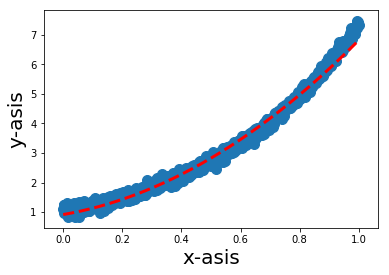

In [6]:
# 將原本的資料與預測的 f(x) 畫出來
plt.scatter(x,y,s=100)
plt.plot(x,pred_result.detach().numpy().squeeze(),'r--',linewidth = 3)
plt.xlabel('x-asis',fontsize=20)
plt.ylabel('y-asis',fontsize=20)

# Gradients for weights
print(weight)
print(weight.grad)

13. 最後我們用手刻，實做出一個 Gradient Descent (based on SGD)，而不是用 Pytorch 套件，同時並觀察 Regression 結果（ -- Implement from scratch 的方式）

In [7]:
# read data
data = scipy.io.loadmat('data.mat')
x, label_data = data['x'].reshape(-1), data['y'].reshape(-1)
train_data = np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
train_data = np.concatenate((train_data,x[:,np.newaxis]**2),axis=1)

dw = 0
db = 0
dg = 0
weight = np.random.randn(3, 1)
alpha = 0.1

# train and update 
for iteration in range(0, 100):
    loss = 0
    
    for i in range(0, train_data.shape[0]):
        
        dg_mask1, dg_mask2 = 0, 0
        train_data_x = train_data[i].reshape(1,3)
        train_data_y = y[i].reshape(1,1)

        # forward propagation and compute loss
        pred_result = np.dot(train_data_x,weight)
        each_loss = np.sum(np.abs(train_data_y-pred_result)) 

        # Partial derivatives of the cost function with respect to z[L], W[L] and b[L]:     
        # 絕對值微分：sign
        if train_data_y-pred_result <= 0 :
            dg_mask1 = 1
        else :
            dg_mask2 = -1
        
        dg = np.array(dg_mask1 + dg_mask2).reshape(1,1)
        dw = np.dot(dg, train_data_x[0][1:3].reshape(1,2))
        db = dg[0]

        # update gradient
        weight[1:3] -= alpha*dw.reshape(2,1)
        weight[0] -= alpha*db

        loss += each_loss

    loss = float(loss/train_data.shape[0])
    print('Iteration {:02} : => Cost : {:.3f}'.format(iteration, loss))
    
pred_result_scratch = np.dot(train_data,weight)

Iteration 00 : => Cost : 0.137
Iteration 01 : => Cost : 0.170
Iteration 02 : => Cost : 0.135
Iteration 03 : => Cost : 0.125
Iteration 04 : => Cost : 0.128
Iteration 05 : => Cost : 0.126
Iteration 06 : => Cost : 0.128
Iteration 07 : => Cost : 0.129
Iteration 08 : => Cost : 0.129
Iteration 09 : => Cost : 0.127
Iteration 10 : => Cost : 0.128
Iteration 11 : => Cost : 0.130
Iteration 12 : => Cost : 0.131
Iteration 13 : => Cost : 0.126
Iteration 14 : => Cost : 0.126
Iteration 15 : => Cost : 0.130
Iteration 16 : => Cost : 0.126
Iteration 17 : => Cost : 0.130
Iteration 18 : => Cost : 0.132
Iteration 19 : => Cost : 0.124
Iteration 20 : => Cost : 0.131
Iteration 21 : => Cost : 0.126
Iteration 22 : => Cost : 0.126
Iteration 23 : => Cost : 0.125
Iteration 24 : => Cost : 0.129
Iteration 25 : => Cost : 0.128
Iteration 26 : => Cost : 0.123
Iteration 27 : => Cost : 0.128
Iteration 28 : => Cost : 0.124
Iteration 29 : => Cost : 0.125
Iteration 30 : => Cost : 0.126
Iteration 31 : => Cost : 0.129
Iteratio

[[ 1.31947626]
 [-0.19363795]
 [ 6.45498955]]


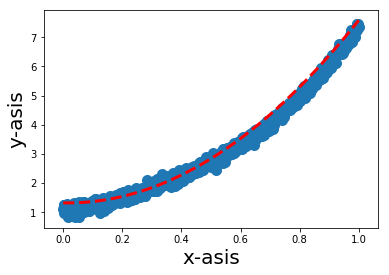

In [8]:
# 將原本的資料與預測的 f(x) 畫出來
plt.scatter(x,label_data,s=100)
plt.plot(x,pred_result_scratch,'r--',linewidth = 3)
plt.xlabel('x-asis',fontsize=20)
plt.ylabel('y-asis',fontsize=20)

# Gradients for weights
print(weight)

# 第二題 與 第三題
- 以下說明解題步驟跟解說每個區塊的程式碼
- 在 back propagation 的地方除了自己實作之外，也和目前 deep learning 框架 "Pytorch" 比較優化結果
- 使用 logistic regression 相關理論概念

1. 首先，先讀 data 資料，並根據題意找出這三個資料並 concatenate 在一起，形成

    $$
    \left\{
       \begin{matrix}
       1 & x_{11} & x_{12} \\
       1 & x_{21} & x_{22} \\
       1 & x_{31} & x_{32} \\
       1 & x_{41} & x_{42} \\
       ...
      \end{matrix} 
    \right\}
    $$
    

2. 然後先將 data 中的 "x1", "x2" 跟 對應的答案 "y" 畫出來 ( scatter plot )，且對應不同的 y 會出不同顏色與標籤的圖示

train data are : torch.Size([70, 3])
label data are : torch.Size([70, 1])


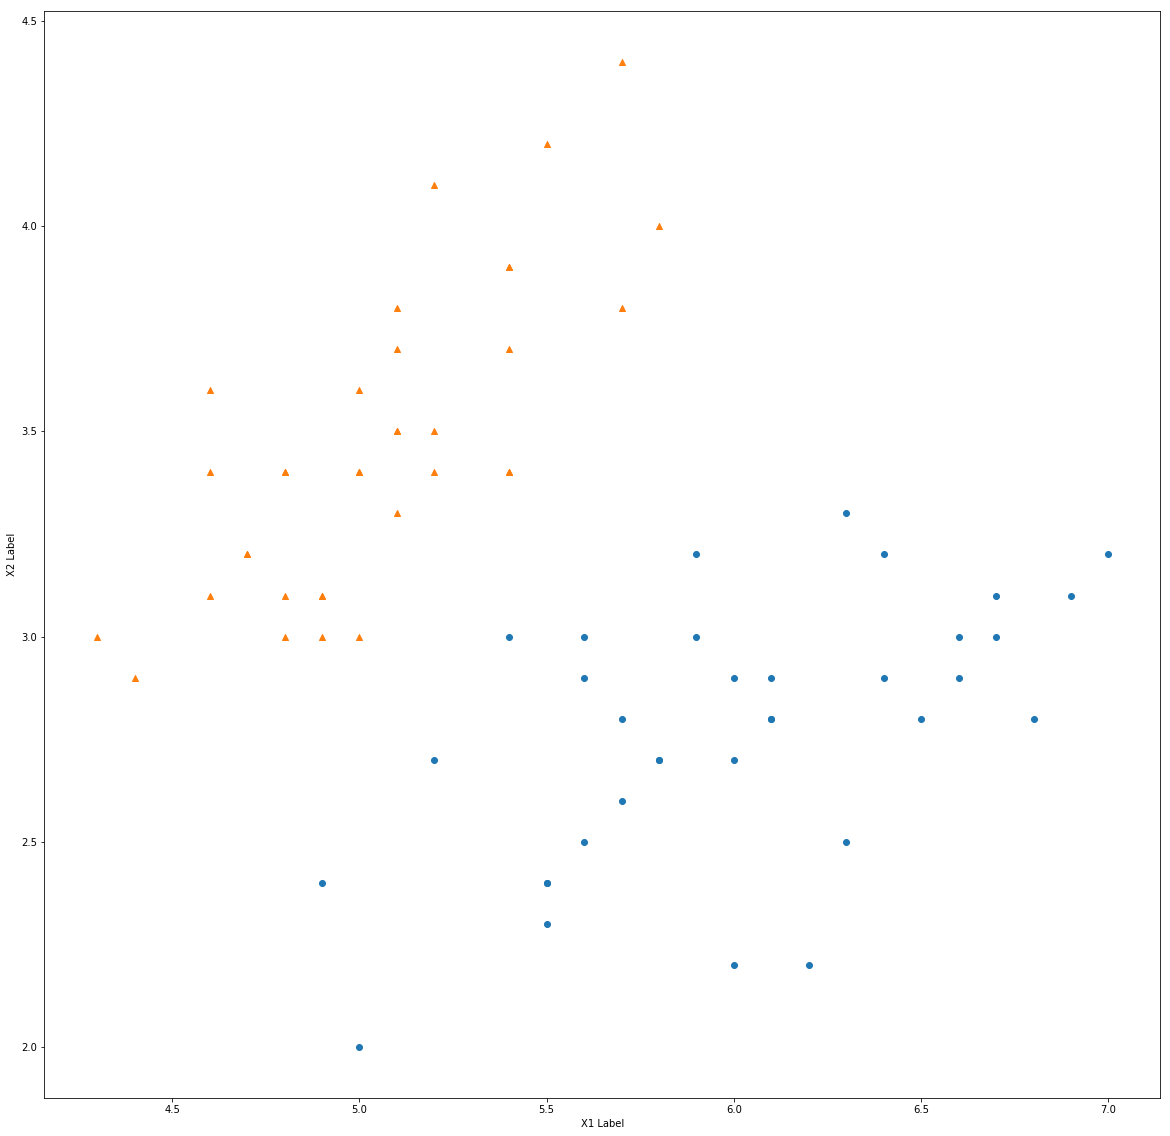

In [9]:
# read data
data = scipy.io.loadmat('train.mat')
x1, x2 = data["x1"], data["x2"]
y = data["y"]
train_data = np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
train_data = np.concatenate((train_data,x2),axis=1)

train_data, label_data = torch.from_numpy(train_data), torch.from_numpy(y)
print("train data are : {}\nlabel data are : {}".format(train_data.size(),label_data.size()))
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(x1[y==0], x2[y==0], marker="o")
ax.scatter(x1[y==1], x2[y==1], marker="^")

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')

plt.show()

3. 初始化權重的維度，大小為 (3*1)，原因是因為輸入為 (x*3)，為了要內積輸出一個 scalar，所以設定為 (3*1)，並簡單利用 randn 隨機產生初始值


4. 寫好 model function ，裡面定義簡單的
    $$ 
        z = \theta_0  + x_{i1}\theta_1 + x_{i2}\theta_2 \\
        y = 1 / ( 1 + \exp^{-z} )
    $$
    並使用 pytorch mm 函式算出


5. 最後輸出預測結果並印出來

In [10]:
weight = torch.randn(3, 1, requires_grad=True)

# Define the model
def model(train_data):
    return 1 / (1 + torch.exp(-1*torch.mm(train_data,weight)))

pred_result = model(train_data)
print("Predicted Values are : {}\nTargets are {}".format(pred_result,label_data))

Predicted Values are : tensor([[0.4178],
        [0.3656],
        [0.4255],
        [0.4233],
        [0.4485],
        [0.4408],
        [0.4730],
        [0.4156],
        [0.4189],
        [0.3813],
        [0.4080],
        [0.4441],
        [0.3792],
        [0.4497],
        [0.4004],
        [0.4807],
        [0.4408],
        [0.4178],
        [0.3823],
        [0.4674],
        [0.3604],
        [0.4507],
        [0.5065],
        [0.3855],
        [0.4441],
        [0.3522],
        [0.4156],
        [0.4037],
        [0.3877],
        [0.4255],
        [0.3952],
        [0.3604],
        [0.5031],
        [0.4763],
        [0.3813],
        [0.1626],
        [0.2159],
        [0.1614],
        [0.2026],
        [0.1657],
        [0.2403],
        [0.2379],
        [0.2782],
        [0.1669],
        [0.2836],
        [0.2175],
        [0.2436],
        [0.1508],
        [0.2114],
        [0.2640],
        [0.1778],
        [0.2772],
        [0.2182],
        [0.1365],
     

6. 定義好 Cross Entropy Loss Function，利用 Pytorch 套件中的 mean 和 mul ，根據 Cross Entropy Loss 定義算出：

    $$
        Let \quad
        z = \theta_0  + x_{i1}\theta_1 + x_{i2}\theta_2 \\
        And \quad
         \hat{y} = 1 / ( 1 + \exp^{-z} ) \\
        Loss \ Function:f(theta) = \sum_{i = 1}^{N} ( \hat{y}\log{y} + (1-\hat{y})\log{(1-y)})
    $$
    

7. 接著利用 pytorch 的 backward() 的找出梯度（ -- Call Function 的方式）


8. 並印出更新後的權重與梯度

In [11]:
# using cross entropy
def cross_entropy(pred_result, label_data) :
    error = -1*torch.mean(torch.mul(pred_result.float(), torch.log(label_data.float()+1e-9)) + torch.mul((1-pred_result.float()), torch.log((1-label_data.float()+1e-9))))    
    return error

# loss backward
loss = cross_entropy(pred_result, label_data)
loss.backward()

# Gradients for weights
print(weight)
print(weight.grad)

tensor([[ 0.2877],
        [-0.5820],
        [ 0.6710]], requires_grad=True)
tensor([[-0.8160],
        [-2.5796],
        [-4.0151]])


9. 利用 pytorch.optimizer.SGD(Or Adam) 的類別設定好 optimizer，來用之後的 Gradient Descent（ -- Call Function 的方式）


10. 全部定義好後，包括 Weight, Network, Loss Function, Optimizer，就開始訓練 10000 個 epoch，並每回合更新梯度並讓 Loss 隨著每回合降低


11. 最後印出訓練好的模型的 model 所預測的結果，並且算出當前 model 對於該資料的 Loss

In [12]:
# define optimizer
optimizer = torch.optim.SGD([weight], lr=5e-4)
# optimizer = torch.optim.Adam([weight], lr=5e-4)

# Train for 10000 epochs
for i in range(10000):
    pred_result = model(train_data)
    loss = cross_entropy(pred_result, label_data)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
#     with torch.no_grad():
#         weight -= weight.grad * 5e-4
#         weight.grad.zero_()

# Calculate loss after training 100 epochs
pred_result = model(train_data)
loss = cross_entropy(pred_result, label_data)
print("Predicted Values are : {}\nTargets are {}".format(pred_result,label_data))
print("Loss on training data is : {}".format(loss))

Predicted Values are : tensor([[0.9533],
        [0.7560],
        [0.9377],
        [0.9250],
        [0.9782],
        [0.9839],
        [0.9820],
        [0.9435],
        [0.8921],
        [0.8356],
        [0.9577],
        [0.9679],
        [0.8063],
        [0.9480],
        [0.9684],
        [0.9967],
        [0.9839],
        [0.9533],
        [0.9387],
        [0.9890],
        [0.8367],
        [0.9821],
        [0.9932],
        [0.8834],
        [0.9679],
        [0.6975],
        [0.9435],
        [0.9382],
        [0.9025],
        [0.9377],
        [0.8723],
        [0.8367],
        [0.9966],
        [0.9950],
        [0.8356],
        [0.0166],
        [0.0903],
        [0.0136],
        [0.0162],
        [0.0101],
        [0.0978],
        [0.1796],
        [0.1371],
        [0.0123],
        [0.2243],
        [0.0161],
        [0.1391],
        [0.0023],
        [0.0517],
        [0.1928],
        [0.0243],
        [0.2815],
        [0.0469],
        [0.0013],
     

12. 最後一步，就是將原資料

    $$
        (X,Y), (X,\hat{Y})
    $$
    畫出來各點並劃出該模型算出的權重所搭起來的二次曲線，也就是 Decision Boundary
    
    $$
        Let \  Decision \  Boundary \  be \  like
        =>\quad 0 = \theta_0  + x_{i1}\theta_1 + x_{i2}\theta_2 \\
        x_{i2} = (- \theta_0 - x_{i1}\theta_1)/\theta_2
    $$
    

8. 並印出更新到最後的權重與梯度

weight are :  [[ 0.75145691]
 [-2.9537008 ]
 [ 4.95081085]]


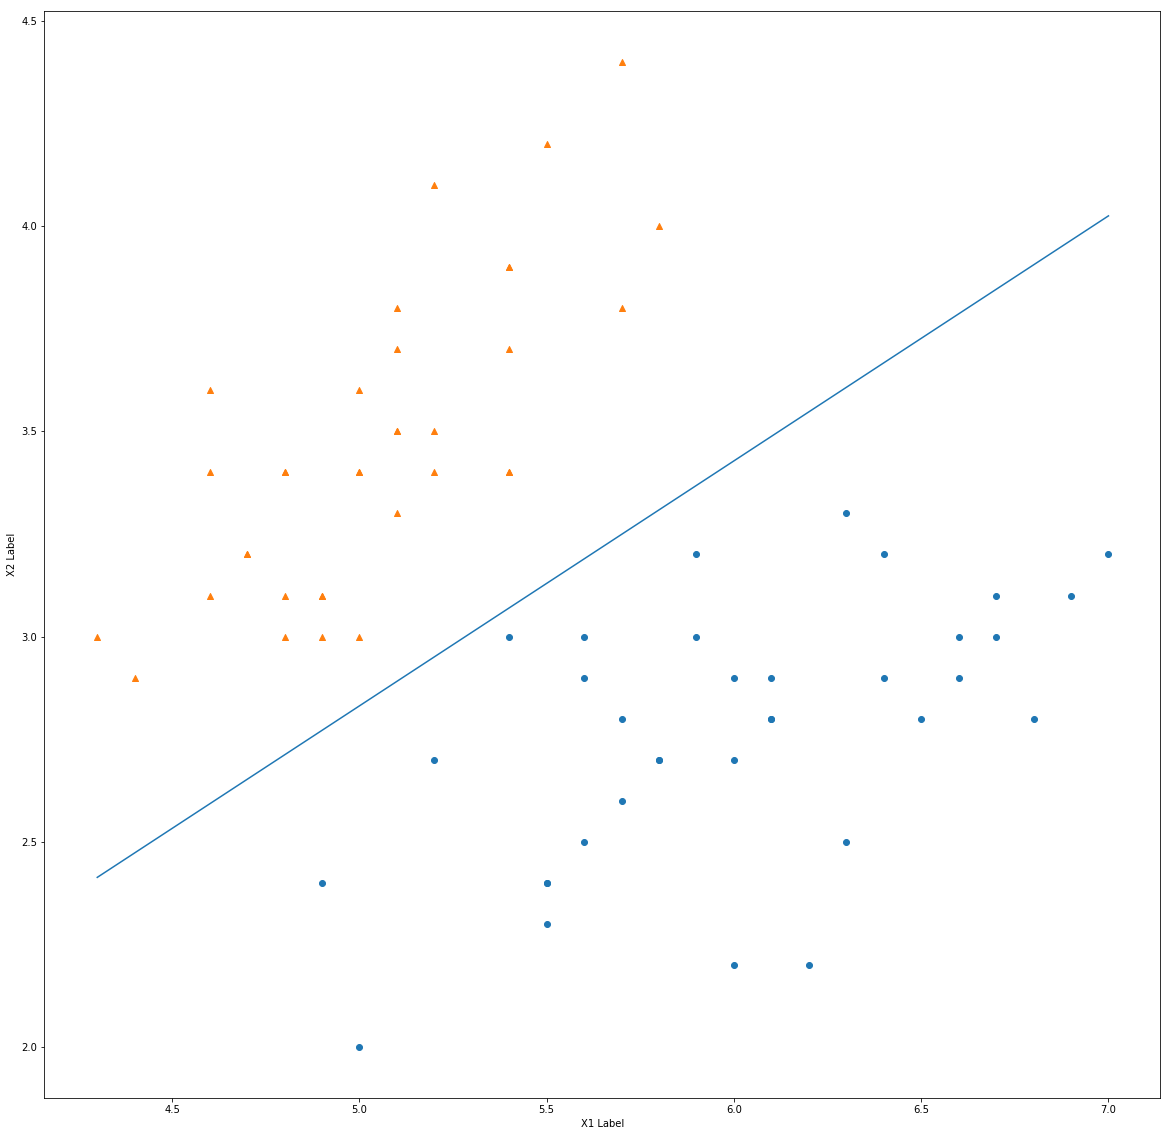

tensor([[ 0.7515],
        [-2.9537],
        [ 4.9508]], requires_grad=True)
tensor([[0.],
        [0.],
        [0.]])


In [13]:
# decision boundary
weight_numpy = weight.detach().numpy()
new_x1 = np.linspace(np.min(x1),np.max(x1),1000)
new_x2 = - (weight_numpy[0] + weight_numpy[1]* new_x1) / weight_numpy[2]
print("weight are : ", weight_numpy)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(x1[y==0], x2[y==0], marker="o")
ax.scatter(x1[y==1], x2[y==1], marker="^")

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.plot(new_x1, new_x2, label='Decision Boundary')
plt.show()

# Gradients for weights
print(weight)
print(weight.grad)

9. 利用剛剛的模型來測試老師給的測試資料集，所以來讀 test data 資料，並根據題意算出 

    $$ 
       ( \hat{x_{i1}} , \hat{x_{i2}}, 1 )
    $$ 
    各項，同時將這三個資料 concatenate 在一起，形成
    $$
    \left\{
       \begin{matrix}
       1 & \hat{x_{11}} & \hat{x_{12}} \\
       1 & \hat{x_{21}} & \hat{x_{22}} \\
       1 & \hat{x_{31}} & \hat{x_{32}} \\
       1 & \hat{x_{41}} & \hat{x_{42}} \\
       ...
      \end{matrix} 
    \right\}
    $$
    
    
10. 輸出預測值之後，將它們與標籤資料 (Y) 來計算出 Cross Entropy Loss，並印出相關資料，包括 Loss Value, Predicted Values


11. 同時，根據預測結果，我們根據課堂上所教，將 >0.5 的值設為 "1"； <=0.5 的值設為 "0"


12. 最後比對預測結果與真實答案，計算出 Accuracy

In [14]:
# here for testing data
data = scipy.io.loadmat('test.mat')
x1, x2 = data["x1"], data["x2"]
y = data["y"]
test_data = np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
test_data = np.concatenate((test_data,x2),axis=1)

test_data, label_data = torch.from_numpy(test_data), torch.from_numpy(y)
# print("test data are : {}\ny are : {}".format(test_data,y))

pred_result = model(test_data)
loss = cross_entropy(pred_result, label_data)
# print("Predicted Values are : {}\nTargets are {}".format(pred_result,label_data))
print("Loss on training data is : {}".format(loss))

# now we set 0.5 as our bound
# prediction that are greater than 0.5, we set as 1, otherwise, we set as 0
pred_result[pred_result<=0.5] = 0
pred_result[pred_result>0.5] = 1

accuracy = (pred_result.detach().numpy().sum() / y.sum())*100
print("accuracy is {} %".format(accuracy))

Loss on training data is : 2.4923245906829834
accuracy is 93.33333333333333 %


13. 接著，利用手刻 Gradient Descent，來更新權重，且使用 Loss Function 為 Cross Entropy （ -- Implement from scratch 的方式）
    - ### *_backpropagation 的相關完整的求導過程在第四題有詳細的截圖介紹！_*

In [15]:
# read data
data = scipy.io.loadmat('train.mat')
x1, x2 = data["x1"], data["x2"]
label_data = data["y"]
train_data = np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
train_data = np.concatenate((train_data,x2),axis=1)

dw = 0
db = 0
dg = 0
weight = np.random.randn(3, 1)
alpha = 0.1

# train and update 
for iteration in range(0, 100):
    loss = 0
    number_correct = 0
    
    for i in range(0, train_data.shape[0]):
        
        train_data_x = train_data[i].reshape(1,3)
        train_data_y = label_data[i].reshape(1,1)

        # forward propagation and compute loss
        pred_result = 1 / (1 + np.exp(-1*np.dot(train_data_x,weight)))
        each_loss = -1*np.mean(np.multiply(pred_result, np.log(train_data_y+1e-9)) + np.multiply((1-pred_result), np.log((1-train_data_y+1e-9))))    

        # Partial derivatives of the cost function with respect to z[L], W[L] and b[L]:        
        # dgL / dWL / dbL
        dg = pred_result - train_data_y
        dw = np.dot(dg, train_data_x[0][1:3].reshape(1,2))
        db = dg
        
        # update gradient
        weight[1:3] -= alpha*dw.reshape(2,1)
        weight[0] -= alpha*db[0]

        loss += each_loss

        each_y_pred = (pred_result > 0.5)
        if each_y_pred[0][0] == train_data_y[0][0]:
            number_correct += 1

    loss = float(loss/train_data.shape[0])
    correct_percent = number_correct/train_data.shape[0]
    print('Iteration {:02} : => Cost : {:.3f}  /  Accuracy : {:.5f} %'.format(iteration, loss, correct_percent*100))

Iteration 00 : => Cost : 1.078  /  Accuracy : 97.14286 %
Iteration 01 : => Cost : 1.507  /  Accuracy : 94.28571 %
Iteration 02 : => Cost : 1.467  /  Accuracy : 94.28571 %
Iteration 03 : => Cost : 1.429  /  Accuracy : 94.28571 %
Iteration 04 : => Cost : 1.393  /  Accuracy : 95.71429 %
Iteration 05 : => Cost : 1.359  /  Accuracy : 95.71429 %
Iteration 06 : => Cost : 1.326  /  Accuracy : 95.71429 %
Iteration 07 : => Cost : 1.294  /  Accuracy : 95.71429 %
Iteration 08 : => Cost : 1.264  /  Accuracy : 95.71429 %
Iteration 09 : => Cost : 1.236  /  Accuracy : 95.71429 %
Iteration 10 : => Cost : 1.208  /  Accuracy : 95.71429 %
Iteration 11 : => Cost : 1.182  /  Accuracy : 97.14286 %
Iteration 12 : => Cost : 1.158  /  Accuracy : 97.14286 %
Iteration 13 : => Cost : 1.134  /  Accuracy : 97.14286 %
Iteration 14 : => Cost : 1.111  /  Accuracy : 97.14286 %
Iteration 15 : => Cost : 1.090  /  Accuracy : 97.14286 %
Iteration 16 : => Cost : 1.069  /  Accuracy : 97.14286 %
Iteration 17 : => Cost : 1.050 

14. 將手刻的模型，用在 training data / test data 上看看，並劃出 decision boundary 來觀察看看

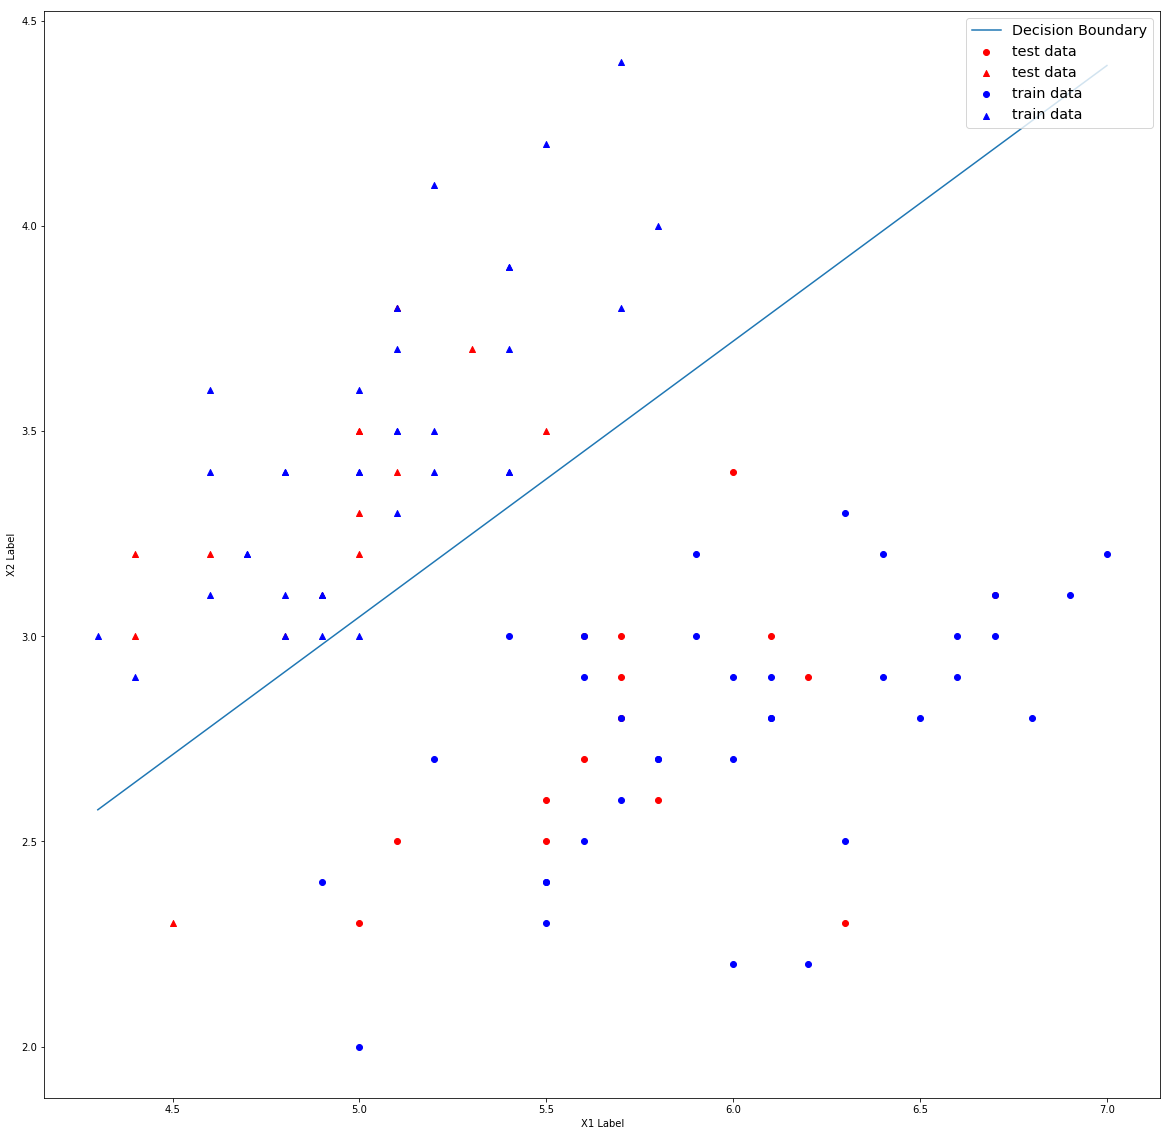

[[ 2.4591464 ]
 [-5.28110404]
 [ 7.85702234]]


In [16]:
# decision boundary
# here for testing data
data = scipy.io.loadmat('test.mat')
test_x1, test_x2 = data["x1"], data["x2"]
test_y = data["y"]

weight_numpy = weight
new_x1 = np.linspace(np.min(x1),np.max(x1),1000)
new_x2 = - (weight_numpy[0] + weight_numpy[1]* new_x1) / weight_numpy[2]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax.scatter(test_x1[test_y==0], test_x2[test_y==0], marker="o", c="red", label='test data')
ax.scatter(test_x1[test_y==1], test_x2[test_y==1], marker="^", c="red", label='test data')
ax.scatter(x1[label_data==0], x2[label_data==0], marker="o", c="blue", label='train data')
ax.scatter(x1[label_data==1], x2[label_data==1], marker="^", c="blue", label='train data')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.plot(new_x1, new_x2, label='Decision Boundary')
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

# Gradients for weights
print(weight)

# 第四題
- 首先我們將以上各個環節給功能化並結合，包括 sigmoid, sigmoid 微分後的 Function, 新增神經網路隱藏層, forward propagation, backpropagation 以及預測結果跟計算準確度

- 其中，我們把「 新增神經網路隱藏層, forward propagation, backpropagation 以及預測結果跟計算準確度...等 」功能利用 Object 的方式包在一起，方便計算、操作

- 與上面三題不同的是，我根據[網上教學](https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536)及自己研究推導過程，實作出 Gradient Descent 以及更新參數

1. 將前幾題中提到的 Logistic Regression 包成 Function，同時也寫一個 sigmoid 求導數的 Function，將導數結果輸出

In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivation(x):
    return sigmoid(x)*(1.0 - sigmoid(x))

2. 寫好一個神經網路的物件，裡面包括神經網路基本的運算，包括梯度更新、forward propagation, backpropagation...

    - 以下來說明一下梯度傳導以及各個權重及 Bias 的更新：
        
        1. __以三層隱藏層來說，前傳導如附圖__：
            <img src="backpropagation_image/5.png" style="width: 250px;"/>
            
        2. __而對於每隔隱藏層的權重及 Bias 更新則如__：
            <img src="backpropagation_image/4.png" style="width: 500px;"/>
            
        3. __其中我們知道 Loss 為：__
            <img src="backpropagation_image/3.png" style="width: 500px;"/>
            
        4. __而將 Loss 對輸出的 $$(\ X_{i} \quad or \quad A{i} \ )$$微分為：__
            <img src="backpropagation_image/7.png" style="width: 500px;"/>
            
        5. __而將 sigmoid 對輸出的 $$(\ z = \theta_0  + x_{i1}\theta_1 + x_{i2}\theta_2 \\ \ )$$微分為：__
            <img src="backpropagation_image/8.png" style="width: 500px;"/>
            
        6. __針對 4, 5 兩點，我們將之結合，對 Output(最後一層) 層進行微分：__
            <img src="backpropagation_image/9.png" style="width: 500px;"/>
            
        7. __接著求導完最後一層後，我們進行前面數層的求導（也就是程式碼中的 g）__：
            <img src="backpropagation_image/10.png" style="width: 500px;"/>
        
        8. __而接著對於每層的權重及 Bias 求導則如：__
            <img src="backpropagation_image/6.png" style="width: 500px;"/>
            
            - __對每層 sigmoid 求導__：
                <img src="backpropagation_image/11.png" style="width: 500px;"/>
                
            - __對每層 權重 求導__：
                <img src="backpropagation_image/2.png" style="width: 500px;"/>
                
            - __對每層 Bias 求導__：
                <img src="backpropagation_image/13.png" style="width: 500px;"/>

In [18]:
class NeuralNetwork(object):
    def __init__(self, layer_unit):
        
        # Initialize the network architecture
        self.layer_number = layer_unit.size - 1 
        self.layer = layer_unit
        
        # Parameters will store the network parameters, i.e. the weights and biases
        self.parameters = {}
        
        # Initialize the network weights and biases:
        for i in range (1, self.layer_number + 1): 
            self.parameters['w' + str(i)] = np.random.randn(self.layer[i], self.layer[i - 1])
            self.parameters['x' + str(i)] = np.ones((self.layer[i], 1))
            self.parameters['b' + str(i)] = np.ones((self.layer[i], 1))
            self.parameters['g' + str(i)] = np.ones((self.layer[i], 1))
        
        # As we started the loop from 1, we haven't initialized a[0]:
        print((self.layer[i], 1))
        self.parameters['x0'] = np.ones((self.layer[i], 1))
        
        # Initialize the cost:
        self.parameters['loss'] = 1
        
        # Create a dictionary for storing the derivatives:
        self.derivatives = {}
                    
    def forward_propagate(self, train_data_x):
        # Note that X here, is just one training example
        self.parameters['x0'] = train_data_x
        
        # Calculate the activations for every layer l
        for l in range(1, self.layer_number + 1):
            self.parameters['g' + str(l)] = np.add(np.dot(self.parameters['w' + str(l)], self.parameters['x' + str(l - 1)]), self.parameters['b' + str(l)])
            self.parameters['x' + str(l)] = sigmoid(self.parameters['g' + str(l)])
        
    def compute_loss(self, train_data_y):
        self.parameters['loss'] = -(train_data_y*np.log(self.parameters['x' + str(self.layer_number)]) + (1-train_data_y)*np.log( 1 - self.parameters['x' + str(self.layer_number)]))
    
    def compute_derivatives(self, train_data_y):
        # Partial derivatives of the cost function with respect to z[L], W[L] and b[L]:        
        # dgL / dWL / dbL
        self.derivatives['dg' + str(self.layer_number)] = self.parameters['x' + str(self.layer_number)] - train_data_y
        self.derivatives['dw' + str(self.layer_number)] = np.dot(self.derivatives['dg' + str(self.layer_number)], np.transpose(self.parameters['x' + str(self.layer_number - 1)]))
        self.derivatives['db' + str(self.layer_number)] = self.derivatives['dg' + str(self.layer_number)]

        # Partial derivatives of the cost function with respect to z[l], W[l] and b[l]
        for l in range(self.layer_number - 1, 0, -1):
            # compute sigmoid's derivation
            sigmoid_after_derivation = sigmoid_derivation(self.parameters['g' + str(l)])
            
            # compute derivation from the above dervied formula
            self.derivatives['dg' + str(l)] = np.dot(np.transpose(self.parameters['w' + str(l + 1)]), self.derivatives['dg' + str(l + 1)])*sigmoid_after_derivation
            self.derivatives['dw' + str(l)] = np.dot(self.derivatives['dg' + str(l)], np.transpose(self.parameters['x' + str(l - 1)]))
            self.derivatives['db' + str(l)] = self.derivatives['dg' + str(l)]
            
    def update_parameters(self, alpha):
        for l in range(1, self.layer_number+1):
            self.parameters['w' + str(l)] -= alpha*self.derivatives['dw' + str(l)]
            self.parameters['b' + str(l)] -= alpha*self.derivatives['db' + str(l)]
        
    def predict(self, data_x):
        self.forward_propagate(data_x)
        return self.parameters['x' + str(self.layer_number)]
        
    def train(self, train_data_x, train_data_y, num_iter, alpha = 0.1):
        for iteration in range(0, num_iter):
            loss = 0 
            number_correct = 0
            
            for i in range(0, train_data_x.shape[0]):
                each_x = train_data_x[i].reshape((train_data_x[i].size, 1))
                each_y = train_data_y[i]

                self.forward_propagate(each_x)
                self.compute_loss(each_y)
                self.compute_derivatives(each_y)
                self.update_parameters(alpha)

                loss += self.parameters['loss'] 

                each_y_pred = self.predict(each_x)
                each_y_pred = (each_y_pred > 0.5) 
                
                if each_y_pred[0][0] == each_y:
                    number_correct += 1
            
            loss = float(loss/train_data_x.shape[0])
            correct_percent = number_correct/train_data_x.shape[0]
            print('Iteration {:02} : => Cost : {:.3f}  /  Accuracy : {:.5f}%'.format(iteration, loss, correct_percent*100))

3. 首先，先讀 data 資料，並根據題意找出這三個資料並 concatenate 在一起，形成

    $$
    \left\{
       \begin{matrix}
       1 & x_{11} & x_{12} \\
       1 & x_{21} & x_{22} \\
       1 & x_{31} & x_{32} \\
       1 & x_{41} & x_{42} \\
       ...
      \end{matrix} 
    \right\}
    $$
    

4. 然後先將 data 中的 "x1", "x2" 跟 對應的答案 "y" 畫出來 ( scatter plot )，且對應不同的 y 會出不同顏色與標籤的圖示

In [19]:
# read data
data = scipy.io.loadmat('train.mat')
x1, x2 = data["x1"], data["x2"]
y_train_data = data["y"]
# x_train_data = np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
x_train_data = np.concatenate((x1,x2),axis=1)

print(x_train_data.shape, y_train_data.shape)

(70, 2) (70, 1)


5. 建立一個神經網路物件，包括輸入層為 3，兩層隱藏層分別為 3,2（包括 weight, Bias），以及最後輸出是一層


6. 建立好物件後，將訓練資料及訓練資料的答案帶入模型訓練，訓練 100 個 epoch，同時印出 Loss 和 Accuracy

In [23]:
#Defining the model architecture
each_layer = np.array([2, 3, 2, 1])

# Creating the model
model = NeuralNetwork(each_layer)

#Training the model
model.train(x_train_data, y_train_data, 1000)

(1, 1)
Iteration 00 : => Cost : 0.551  /  Accuracy : 77.14286%
Iteration 01 : => Cost : 0.606  /  Accuracy : 71.42857%
Iteration 02 : => Cost : 0.593  /  Accuracy : 71.42857%
Iteration 03 : => Cost : 0.572  /  Accuracy : 74.28571%
Iteration 04 : => Cost : 0.548  /  Accuracy : 77.14286%
Iteration 05 : => Cost : 0.522  /  Accuracy : 80.00000%
Iteration 06 : => Cost : 0.493  /  Accuracy : 82.85714%
Iteration 07 : => Cost : 0.461  /  Accuracy : 85.71429%
Iteration 08 : => Cost : 0.427  /  Accuracy : 88.57143%
Iteration 09 : => Cost : 0.392  /  Accuracy : 90.00000%
Iteration 10 : => Cost : 0.357  /  Accuracy : 92.85714%
Iteration 11 : => Cost : 0.323  /  Accuracy : 94.28571%
Iteration 12 : => Cost : 0.291  /  Accuracy : 95.71429%
Iteration 13 : => Cost : 0.263  /  Accuracy : 97.14286%
Iteration 14 : => Cost : 0.239  /  Accuracy : 98.57143%
Iteration 15 : => Cost : 0.213  /  Accuracy : 98.57143%
Iteration 16 : => Cost : 0.193  /  Accuracy : 100.00000%
Iteration 17 : => Cost : 0.177  /  Accur

Iteration 146 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 147 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 148 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 149 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 150 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 151 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 152 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 153 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 154 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 155 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 156 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 157 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 158 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 159 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 160 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 161 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 162 : => Cost : 0.004  /  Accuracy : 100.00000%
Iteration 163 

Iteration 297 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 298 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 299 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 300 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 301 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 302 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 303 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 304 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 305 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 306 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 307 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 308 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 309 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 310 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 311 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 312 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 313 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 314 

Iteration 441 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 442 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 443 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 444 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 445 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 446 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 447 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 448 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 449 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 450 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 451 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 452 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 453 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 454 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 455 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 456 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 457 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 458 

Iteration 593 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 594 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 595 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 596 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 597 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 598 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 599 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 600 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 601 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 602 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 603 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 604 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 605 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 606 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 607 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 608 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 609 : => Cost : 0.001  /  Accuracy : 100.00000%
Iteration 610 

Iteration 742 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 743 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 744 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 745 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 746 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 747 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 748 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 749 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 750 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 751 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 752 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 753 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 754 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 755 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 756 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 757 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 758 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 759 

Iteration 893 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 894 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 895 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 896 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 897 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 898 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 899 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 900 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 901 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 902 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 903 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 904 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 905 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 906 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 907 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 908 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 909 : => Cost : 0.000  /  Accuracy : 100.00000%
Iteration 910 

9. 利用剛剛的模型來測試老師給的測試資料集，所以來讀 test data 資料，並根據題意算出 

    $$ 
       ( \hat{x_{i1}} , \hat{x_{i2}}, 1 )
    $$ 
    各項，同時將這三個資料 concatenate 在一起，形成
    $$
    \left\{
       \begin{matrix}
       1 & \hat{x_{11}} & \hat{x_{12}} \\
       1 & \hat{x_{21}} & \hat{x_{22}} \\
       1 & \hat{x_{31}} & \hat{x_{32}} \\
       1 & \hat{x_{41}} & \hat{x_{42}} \\
       ...
      \end{matrix} 
    \right\}
    $$
    
    
10. 根據剛剛訓練好的模型，將讀進來的每筆資料，預測出相對應的結果。同時，根據預測結果，我們根據課堂上所教，將 >0.5 的值設為 "1"； <=0.5 的值設為 "0"


11. 最後比對預測結果與真實答案，計算出 Accuracy

In [24]:
# here for testing data
data = scipy.io.loadmat('test.mat')
x1, x2 = data["x1"], data["x2"]
y_test_data = data["y"]
# x_test_data = np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
x_test_data = np.concatenate((x1,x2),axis=1)

#Predicting the test set results:
n_c = 0
for i in range(0, x_test_data.shape[0]):
    x = x_test_data[i].reshape((x_test_data[i].size, 1))
    y = y_test_data[i]
    y_pred = model.predict(x)
    y_pred = (y_pred > 0.5)
    if y_pred == y:
        n_c += 1

print("Test Accuracy", (n_c/x_test_data.shape[0])*100)

Test Accuracy 96.66666666666667


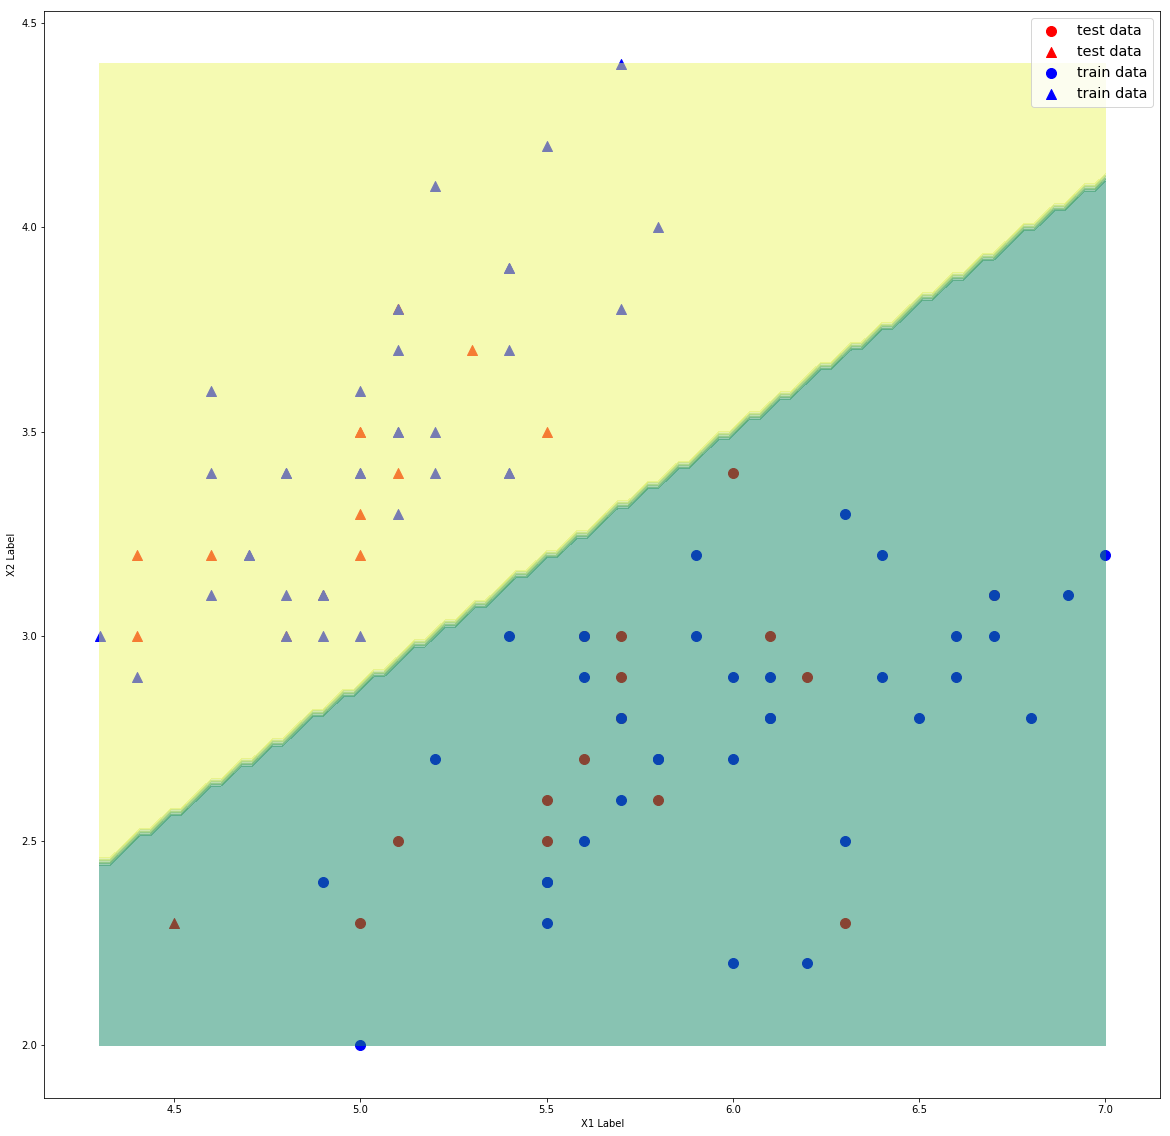

[[ 2.4591464 ]
 [-5.28110404]
 [ 7.85702234]]


In [25]:
# decision boundary
# here for testing data
data = scipy.io.loadmat('test.mat')
test_x1, test_x2 = data["x1"], data["x2"]
test_y = data["y"]
data = scipy.io.loadmat('train.mat')
x1, x2 = data["x1"], data["x2"]
label_data = data["y"]

new_x1 = np.linspace(np.min(x1),np.max(x1),100).reshape(100,1)
new_x2 = np.linspace(np.min(x2),np.max(x2),100).reshape(100,1)
new_x1, new_x2 = np.meshgrid(new_x1, new_x2)
new_x1, new_x2 = new_x1.ravel().reshape(10000,1), new_x2.ravel().reshape(10000,1)
# new_x = np.concatenate((np.ones((new_x1.shape[0],1)),new_x1),axis=1)
new_x = np.concatenate((new_x1,new_x2),axis=1)

y = np.zeros((10000,1))
for i in range(0, new_x.shape[0]):
    x = new_x[i].reshape((new_x[i].size, 1))
    y[i] = model.predict(x)
    if y[i] > 0.5 :
        y[i] = 1
    else :
        y[i] = 0

y = y.reshape(100,100)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax.scatter(test_x1[test_y==0], test_x2[test_y==0], marker="o", c="red", label='test data', s=100)
ax.scatter(test_x1[test_y==1], test_x2[test_y==1], marker="^", c="red", label='test data', s=100)
ax.scatter(x1[label_data==0], x2[label_data==0], marker="o", c="blue", label='train data', s=100)
ax.scatter(x1[label_data==1], x2[label_data==1], marker="^", c="blue", label='train data', s=100)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')

plt.contourf(new_x1.reshape(100,100), new_x2.reshape(100,100), y, 8, alpha=.5, cmap=plt.get_cmap("summer"))
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

# Gradients for weights
print(weight)